# My Deep Learning Framework

In [176]:
import random
import matplotlib.pyplot as plt
import numpy as np

Labels
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [92]:
def get_article(id):
    articles = {
            0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 
            5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
    return articles.get(id)

### Matrix Utilities

In [175]:
def random_matrix(n_rows, n_cols, n_decimals=4):
    matrix = []
    for _ in range(n_rows):
        cols = []
        for _ in range(n_cols):
            number = round(random.random(),n_decimals)
            cols.append(number)
        matrix.append(cols)
    return matrix
    
def create_matrix(n_rows, n_cols, value=0):
    return [ [ value for _ in range(n_cols)] for _ in range(n_rows) ]

def create_vector(n_size, value=0):
    return [value for _ in range(n_size)]


def reshape_vector(vector, n_rows):
    matrix = []
    n_cols = int(len(vector) / n_rows)
    begin = 0
    for _ in range(n_rows):
        row = vector[begin : begin + n_cols]
        matrix.append(row)
        begin +=  n_cols
    return matrix

def multiply_matrix(matrix_A, matrix_B):
    A_rows, A_cols = len(matrix_A), len(matrix_A[0])
    B_rows, B_cols = len(matrix_B), len(matrix_B[0])

    #if A_cols != B_rows: 
    #    raise ValueError(f"Incompatible dimentions: A col: {A_cols} != {B_rows}" )
    
    result_matrix = create_matrix(A_rows, B_cols)
    
    for i in range(A_rows):
        for j in range(B_cols):
            for k in range(B_rows):
                result_matrix[i][j] += matrix_A[i][k] * matrix_B[k][j]

    return result_matrix

#print(random_matrix(2,2))
#rint(create_vector(5))
#print(create_matrix(5, 2))
#print(reshape_vector([1,2,3,4,5,6], 3))
A = [[1, 2, 3], 
    [4, 5, 6]]
B = [[1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]]

multiply_matrix(A, B)

[[38, 44, 50, 56], [83, 98, 113, 128]]

### Loading Fashion MNIST data

In [118]:
base_data_path = 'fashion-mnist-data'

def load_data():
    y_data = []
    x_data = []

    with open(f'./{base_data_path}/fashion-mnist_train.csv', "r") as file:
        next(file)
        for index, line in enumerate(file.readlines()):
            y_data.append(int(line.split(",")[0]))
            x_data.append([ int(pixel) for pixel in line.split(",")[1:] ])
            if index >= 10: break
    return x_data, y_data

X,Y = load_data()

In [119]:
Y[0], get_article(Y[0])

(2, 'Pullover')

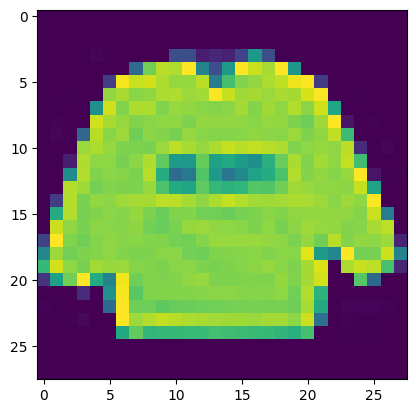

In [120]:
x_img = reshape_vector(X[0],28)
plt.imshow(x_img)
plt.show()

In [177]:
def initialize_params(n_samples, n_features):
    W =  random_matrix(n_samples, n_features)
    b = create_vector(n_samples, 1)
    return W, b

n_samples = len(X)
n_features = len(X[0])
n_inputs = n_features * n_features
n_samples, n_features, n_inputs

W, b = initialize_params(n_samples, n_features)
Z = multiply_matrix(W, X)

(11, 784, 614656)

### Building the Neural Network

In [205]:
def initialize_params(n_rows, n_cols):
    W = np.random.randn(n_rows, n_cols) * 0.01
    b = np.zeros(shape=(n_rows, 1))
    return W, b
    
def ReLU(x):
    return np.maximum(0, x)

def Softmax(X):
    pass

A = [[-1, 0.5, -0.23], [0.67, -2.8, 2.12]]
ReLU(A)

array([[0.  , 0.5 , 0.  ],
       [0.67, 0.  , 2.12]])

Creating a Neural Network with:
- 3 layers: 1 input, 1 hidden, 1 output
- hidden layer

In [208]:
# Converting arrays to numpy
X = np.array(X)
Y = np.array(Y)

n_samples, n_features = X.shape[0], X.shape[1]

# Normalizing X
X_norm = X / 255

### Forward Propagation ###

## Layer 1
# Initializing W and b
W_1, b_1 = initialize_params(n_rows=n_features, n_cols=n_samples)

# Scores: Linear function
Z_1 = (W @ X) + b

# Activation Function
a_1 = ReLU(Z_1)

## Layer 2
n_neurons = 50
W_2, b_2 = initialize_params(n_rows=n_neurons, n_cols=a_1.shape[1])

n_samples, n_features

(11, 784)

In [209]:
W_2.shape, b_2.shape

((50, 784), (50, 1))